In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
import os
import seaborn as sns
import pdb

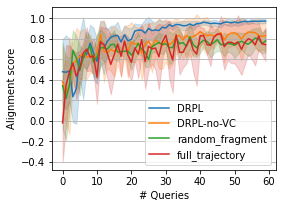

In [26]:
experiments = [
    {
        "cat": "DRPL",
        "run": 1,
        "csv": "aprel_trajectories_5dim_newscene_seed0/scene_graph.csv",
    },
    {
        "cat": "DRPL",
        "run": 2,
        "csv": "aprel_trajectories_5dim_newscene_seed1/scene_graph.csv",
    },
    {
        "cat": "DRPL",
        "run": 3,
        "csv": "aprel_trajectories_5dim_newscene_seed2/scene_graph.csv",
    },
    {
        "cat": "DRPL",
        "run": 4,
        "csv": "aprel_trajectories_5dim_newscene_seed3/scene_graph.csv",
    },
    {
        "cat": "DRPL",
        "run": 5,
        "csv": "aprel_trajectories_5dim_newscene_seed4/scene_graph.csv",
    },
    {
        "cat": "DRPL-no-VC",
        "run": 1,
        "csv": "aprel_trajectories_5dim_newscene_seed0/scene_graph_noselect.csv",
    },
    {
        "cat": "DRPL-no-VC",
        "run": 2,
        "csv": "aprel_trajectories_5dim_newscene_seed1/scene_graph_noselect.csv",
    },
    {
        "cat": "DRPL-no-VC",
        "run": 3,
        "csv": "aprel_trajectories_5dim_newscene_seed2/scene_graph_noselect.csv",
    },
    {
        "cat": "DRPL-no-VC",
        "run": 4,
        "csv": "aprel_trajectories_5dim_newscene_seed3/scene_graph_noselect.csv",
    },
    {
        "cat": "DRPL-no-VC",
        "run": 5,
        "csv": "aprel_trajectories_5dim_newscene_seed4/scene_graph_noselect.csv",
    },
    {
        "cat": "random_fragment",
        "run": 1,
        "csv": "aprel_trajectories_5dim_newscene_seed0/random_fragment.csv",
    },
    {
        "cat": "random_fragment",
        "run": 2,
        "csv": "aprel_trajectories_5dim_newscene_seed1/random_fragment.csv",
    },
    {
        "cat": "random_fragment",
        "run": 3,
        "csv": "aprel_trajectories_5dim_newscene_seed2/random_fragment.csv",
    },
    {
        "cat": "random_fragment",
        "run": 4,
        "csv": "aprel_trajectories_5dim_newscene_seed3/random_fragment.csv",
    },
    {
        "cat": "random_fragment",
        "run": 5,
        "csv": "aprel_trajectories_5dim_newscene_seed4/random_fragment.csv",
    },
    {
        "cat": "full_trajectory",
        "run": 1,
        "csv": "aprel_trajectories_5dim_newscene_seed0/random.csv",
    },
    {
        "cat": "full_trajectory",
        "run": 2,
        "csv": "aprel_trajectories_5dim_newscene_seed1/random.csv",
    },
    {
        "cat": "full_trajectory",
        "run": 3,
        "csv": "aprel_trajectories_5dim_newscene_seed2/random.csv",
    },
    {
        "cat": "full_trajectory",
        "run": 4,
        "csv": "aprel_trajectories_5dim_newscene_seed3/random.csv",
    },
    {
        "cat": "full_trajectory",
        "run": 5,
        "csv": "aprel_trajectories_5dim_newscene_seed4/random.csv",
    },
]
dfs = []
for experiment in experiments:
    df = pd.read_csv(experiment['csv'],header=None)
    df['value'] = df[0]
    df['step'] = df.index.values
    df['cat'] = experiment['cat']
    df['run'] = experiment['run']
    # print(df['value'])
    # df = df.rename(columns={"Value": "Success"})
    dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="step", y="value", hue="cat", ax=ax, legend=True,ci=68)
# ax.set_xlim(0, 0.55e6+1e5)
# ax.set_ylim(0, 1.1)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
# ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "lower right")
ax.set_xlabel("# Queries")
ax.set_ylabel("Alignment score")
ax.grid(visible=True, axis='y')
plt.show()
fig.savefig("lunar_lander_5d_feature_6d_SG_std.pdf", bbox_inches='tight')


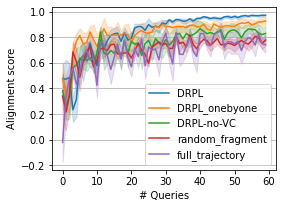

In [28]:
experiments = [
    {
        "cat": "DRPL",
        "run": 1,
        "csv": "aprel_trajectories_5dim_newscene_seed0/scene_graph.csv",
    },
    {
        "cat": "DRPL",
        "run": 2,
        "csv": "aprel_trajectories_5dim_newscene_seed1/scene_graph.csv",
    },
    {
        "cat": "DRPL",
        "run": 3,
        "csv": "aprel_trajectories_5dim_newscene_seed2/scene_graph.csv",
    },
    {
        "cat": "DRPL",
        "run": 4,
        "csv": "aprel_trajectories_5dim_newscene_seed3/scene_graph.csv",
    },
    {
        "cat": "DRPL",
        "run": 5,
        "csv": "aprel_trajectories_5dim_newscene_seed4/scene_graph.csv",
    },
    {
        "cat": "DRPL_onebyone",
        "run": 1,
        "csv": "aprel_trajectories_5dim_newscene_seed0/scene_graph_onebyone.csv",
    },
    {
        "cat": "DRPL_onebyone",
        "run": 2,
        "csv": "aprel_trajectories_5dim_newscene_seed1/scene_graph_onebyone.csv",
    },
    {
        "cat": "DRPL_onebyone",
        "run": 3,
        "csv": "aprel_trajectories_5dim_newscene_seed2/scene_graph_onebyone.csv",
    },
    {
        "cat": "DRPL_onebyone",
        "run": 4,
        "csv": "aprel_trajectories_5dim_newscene_seed3/scene_graph_onebyone.csv",
    },
    {
        "cat": "DRPL_onebyone",
        "run": 5,
        "csv": "aprel_trajectories_5dim_newscene_seed4/scene_graph_onebyone.csv",
    },
    {
        "cat": "DRPL-no-VC",
        "run": 1,
        "csv": "aprel_trajectories_5dim_newscene_seed0/scene_graph_noselect.csv",
    },
    {
        "cat": "DRPL-no-VC",
        "run": 2,
        "csv": "aprel_trajectories_5dim_newscene_seed1/scene_graph_noselect.csv",
    },
    {
        "cat": "DRPL-no-VC",
        "run": 3,
        "csv": "aprel_trajectories_5dim_newscene_seed2/scene_graph_noselect.csv",
    },
    {
        "cat": "DRPL-no-VC",
        "run": 4,
        "csv": "aprel_trajectories_5dim_newscene_seed3/scene_graph_noselect.csv",
    },
    {
        "cat": "DRPL-no-VC",
        "run": 5,
        "csv": "aprel_trajectories_5dim_newscene_seed4/scene_graph_noselect.csv",
    },
    {
        "cat": "random_fragment",
        "run": 1,
        "csv": "aprel_trajectories_5dim_newscene_seed0/random_fragment.csv",
    },
    {
        "cat": "random_fragment",
        "run": 2,
        "csv": "aprel_trajectories_5dim_newscene_seed1/random_fragment.csv",
    },
    {
        "cat": "random_fragment",
        "run": 3,
        "csv": "aprel_trajectories_5dim_newscene_seed2/random_fragment.csv",
    },
    {
        "cat": "random_fragment",
        "run": 4,
        "csv": "aprel_trajectories_5dim_newscene_seed3/random_fragment.csv",
    },
    {
        "cat": "random_fragment",
        "run": 5,
        "csv": "aprel_trajectories_5dim_newscene_seed4/random_fragment.csv",
    },
    {
        "cat": "full_trajectory",
        "run": 1,
        "csv": "aprel_trajectories_5dim_newscene_seed0/random.csv",
    },
    {
        "cat": "full_trajectory",
        "run": 2,
        "csv": "aprel_trajectories_5dim_newscene_seed1/random.csv",
    },
    {
        "cat": "full_trajectory",
        "run": 3,
        "csv": "aprel_trajectories_5dim_newscene_seed2/random.csv",
    },
    {
        "cat": "full_trajectory",
        "run": 4,
        "csv": "aprel_trajectories_5dim_newscene_seed3/random.csv",
    },
    {
        "cat": "full_trajectory",
        "run": 5,
        "csv": "aprel_trajectories_5dim_newscene_seed4/random.csv",
    },
]
dfs = []
for experiment in experiments:
    df = pd.read_csv(experiment['csv'],header=None)
    df['value'] = df[0]
    df['step'] = df.index.values
    df['cat'] = experiment['cat']
    df['run'] = experiment['run']
    # print(df['value'])
    # df = df.rename(columns={"Value": "Success"})
    dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="step", y="value", hue="cat", ax=ax, legend=True,ci=68)
# ax.set_xlim(0, 0.55e6+1e5)
# ax.set_ylim(0, 1.1)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
# ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "lower right")
ax.set_xlabel("# Queries")
ax.set_ylabel("Alignment score")
ax.grid(visible=True, axis='y')
plt.show()
# fig.savefig("lunar_lander_5d_feature_6d_SG_se_with.pdf", bbox_inches='tight')


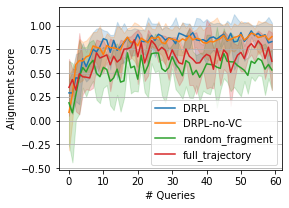

In [27]:
experiments = [
    {
        "cat": "DRPL",
        "run": 1,
        "csv": "robosuite/Reaching/Reaching_seed0ReachingSGPL.csv",
    },
    {
        "cat": "DRPL",
        "run": 2,
        "csv": "robosuite/Reaching/Reaching_seed1ReachingSGPL.csv",
    },
    {
        "cat": "DRPL",
        "run": 3,
        "csv": "robosuite/Reaching/Reaching_seed2ReachingSGPL.csv",
    },
    {
        "cat": "DRPL",
        "run": 4,
        "csv": "robosuite/Reaching/Reaching_seed3ReachingSGPL.csv",
    },
    {
        "cat": "DRPL",
        "run": 5,
        "csv": "robosuite/Reaching/Reaching_seed4ReachingSGPL.csv",
    },
    {
        "cat": "DRPL-no-VC",
        "run": 1,
        "csv": "robosuite/Reaching/Reaching_seed0ReachingSGPL-no-VC.csv",
    },
    {
        "cat": "DRPL-no-VC",
        "run": 2,
        "csv": "robosuite/Reaching/Reaching_seed1ReachingSGPL-no-VC.csv",
    },
    {
        "cat": "DRPL-no-VC",
        "run": 3,
        "csv": "robosuite/Reaching/Reaching_seed2ReachingSGPL-no-VC.csv",
    },
    {
        "cat": "DRPL-no-VC",
        "run": 4,
        "csv": "robosuite/Reaching/Reaching_seed3ReachingSGPL-no-VC.csv",
    },
    {
        "cat": "DRPL-no-VC",
        "run": 5,
        "csv": "robosuite/Reaching/Reaching_seed4ReachingSGPL-no-VC.csv",
    },
    {
        "cat": "random_fragment",
        "run": 1,
        "csv": "robosuite/Reaching/Reaching_seed0Reachingrandom_fragment.csv",
    },
    {
        "cat": "random_fragment",
        "run": 2,
        "csv": "robosuite/Reaching/Reaching_seed1Reachingrandom_fragment.csv",
    },
    {
        "cat": "random_fragment",
        "run": 3,
        "csv": "robosuite/Reaching/Reaching_seed2Reachingrandom_fragment.csv",
    },
    {
        "cat": "random_fragment",
        "run": 4,
        "csv": "robosuite/Reaching/Reaching_seed3Reachingrandom_fragment.csv",
    },
    {
        "cat": "random_fragment",
        "run": 5,
        "csv": "robosuite/Reaching/Reaching_seed4Reachingrandom_fragment.csv",
    },
    {
        "cat": "full_trajectory",
        "run": 1,
        "csv": "robosuite/Reaching/Reaching_seed0Reachingfull_trajectory.csv",
    },
    {
        "cat": "full_trajectory",
        "run": 2,
        "csv": "robosuite/Reaching/Reaching_seed1Reachingfull_trajectory.csv",
    },
    {
        "cat": "full_trajectory",
        "run": 3,
        "csv": "robosuite/Reaching/Reaching_seed2Reachingfull_trajectory.csv",
    },
    {
        "cat": "full_trajectory",
        "run": 4,
        "csv": "robosuite/Reaching/Reaching_seed3Reachingfull_trajectory.csv",
    },
    {
        "cat": "full_trajectory",
        "run": 5,
        "csv": "robosuite/Reaching/Reaching_seed4Reachingfull_trajectory.csv",
    },
]
dfs = []
for experiment in experiments:
    df = pd.read_csv(experiment['csv'],header=None)
    df['value'] = df[0]
    df['step'] = df.index.values
    df['cat'] = experiment['cat']
    df['run'] = experiment['run']
    # print(df['value'])
    # df = df.rename(columns={"Value": "Success"})
    dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="step", y="value", hue="cat", ax=ax, legend=True,ci="sd")
# ax.set_xlim(0, 0.55e6+1e5)
# ax.set_ylim(0, 1.1)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
# ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "lower right")
ax.set_xlabel("# Queries")
ax.set_ylabel("Alignment score")
ax.grid(visible=True, axis='y')
plt.show()
fig.savefig("robosuite/Reaching_std.pdf", bbox_inches='tight')


In [74]:
dfs = []
res = {experiment['cat']: [] for experiment in experiments}
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    res[experiment['cat']].append(df["Value"][-20:].mean())
for exp in res:
    print(f"{np.mean(res[exp])}, {np.std(res[exp])}")
print(res)

0.502999996393919, 0.0014999978244304435
0.9804608196020126, 0.012889277935028087
{'RGB-D only': [0.5044999942183495, 0.5014999985694886], 'RGB-D + SG': [0.9675715416669846, 0.9933500975370407]}


In [75]:
HUE_ORDER_1=[
    "RGB-D + SG",
    "RGB-D + MM",
    "RGB-D + SG + TD ATTN",
    "RGB-D only",
    "GCN",
    "Expanded Representations"
]

HUE_ORDER_2=[
    "PM: RGB-D + SG",
    "PM: RGB-D + MM",
    "PM: RGB-D + SG + TD ATTN",
]

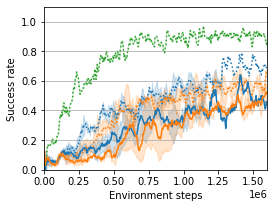

In [76]:
experiments = [
    {
        "cat": "PM: RGB-D + SG",
        "run": 1,
        "csv": "./sg_preseed/run-relational_search_sg_all_no_goal_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + SG",
        "run": 2,
        "csv": "./sg_preseed/run-relational_search_sg_preseed_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + MM",
        "run": 1,
        "csv": "./mcm_preseed/run-relational_search_mcm_preseed_seed_0_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + MM",
        "run": 2,
        "csv": "./mcm_preseed/run-relational_search_mcm_preseed_seed_2_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + SG + TD ATTN",
        "run": 1,
        "csv": "./fasg_preseed/run-search_fixed_attention_mj_3_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + SG + TD ATTN",
        "run": 2,
        "csv": "./fasg_preseed/run-search_fixed_attention_mj_3_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
]
dfs = []
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    df['cat'] = experiment['cat']
    df['run'] = experiment['run']
    df = df.rename(columns={"Value": "Success"})
    dfs.append(df)
success_df_preseed = pd.concat(dfs, ignore_index=True)

experiments = [
    {
        "cat": "RGB-D + SG",
        "run": 1,
        "csv": "./sg/run-relational_search_sg_hetero_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG",
        "run": 2,
        "csv": "./sg/run-relational_search_sg_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + MM",
        "run": 1,
        "csv": "./mcm/run-relational_search_mcm_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + MM",
        "run": 2,
        "csv": "./mcm/run-relational_search_mcm_10_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
]
dfs = []
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    df['cat'] = experiment['cat']
    df['run'] = experiment['run']
    df = df.rename(columns={"Value": "Success"})
    dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df_preseed, x="Step", y="Success", hue="cat", ax=ax, legend=False, linestyle="dotted", hue_order=HUE_ORDER_2)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=False, hue_order=HUE_ORDER_1)
ax.set_xlim(0, 1.5e6+1e5)
ax.set_ylim(0, 1.1)
#ax1.set_xticks(np.arange(0, 2e7+1, 4e6))
ax.set_xlabel("Environment steps")
ax.set_ylabel("Success rate")
ax.grid(visible=True, axis='y')
fig.savefig("/Users/michael/Downloads/f3_a_new.pdf", bbox_inches='tight')

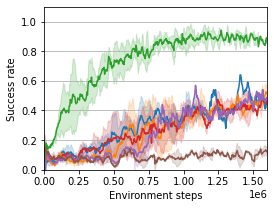

In [77]:
experiments = [
    {
        "cat": "RGB-D only",
        "run": 1,
        "csv": "./rgb/search_rgb_10_success_mean.csv",
    },
    {
        "cat": "RGB-D only",
        "run": 2,
        "csv": "./rgb/relational_search_rgb_seed_1_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG",
        "run": 1,
        "csv": "./sg/run-relational_search_sg_hetero_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG",
        "run": 2,
        "csv": "./sg/run-relational_search_sg_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + MM",
        "run": 1,
        "csv": "./mcm/run-relational_search_mcm_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + MM",
        "run": 2,
        "csv": "./mcm/run-relational_search_mcm_10_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG + TD ATTN",
        "run": 1,
        "csv": "./fasg/run-search_fixed_attention_seed_2_mj_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG + TD ATTN",
        "run": 2,
        "csv": "./fasg/run-search_fixed_attention_no_preseed_seed_2_mj_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "GCN",
        "run": 1,
        "csv": "./gcn/run-gcn_seed1-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "GCN",
        "run": 2,
        "csv": "./gcn/run-gcn_seed0-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "Expanded Representations",
        "run": 1,
        "csv": "./scene_priors/run-scene_priors_seed1-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "Expanded Representations",
        "run": 2,
        "csv": "./scene_priors/run-scene_priors_seed0-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    
]
dfs = []
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    df['cat'] = experiment['cat']
    df['run'] = experiment['run']
    df = df.rename(columns={"Value": "Success"})
    dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=False, hue_order=HUE_ORDER_1)
ax.set_xlim(0, 1.5e6+1e5)
ax.set_ylim(0, 1.1)
#ax1.set_xticks(np.arange(0, 2e7+1, 4e6))
ax.set_xlabel("Environment steps")
ax.set_ylabel("Success rate")
ax.grid(visible=True, axis='y')
fig.savefig("/Users/michael/Downloads/f5_a_new.pdf", bbox_inches='tight')

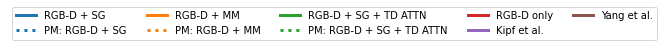

In [90]:
from matplotlib.lines import Line2D
cmap = plt.get_cmap("tab10")

custom_lines = [
    Line2D([0], [0], color=cmap(0), lw=3),
    Line2D([0], [0], color=cmap(0), lw=3, linestyle='dotted'),
    Line2D([0], [0], color=cmap(1), lw=3),
    Line2D([0], [0], color=cmap(1), lw=3, linestyle='dotted'),
    Line2D([0], [0], color=cmap(2), lw=3),
    Line2D([0], [0], color=cmap(2), lw=3, linestyle='dotted'),
    Line2D([0], [0], color=cmap(3), lw=3),
    Line2D([0], [0], color=cmap(4), lw=3),
    Line2D([0], [0], color=cmap(5), lw=3),
]

fig = plt.figure(figsize=(4,0.5))
ax = fig.add_subplot(111)
ax.set_axis_off()
#lines = ax.plot(data)
ax.legend(custom_lines, ['RGB-D + SG', 'PM: RGB-D + SG', 'RGB-D + MM', 'PM: RGB-D + MM', 'RGB-D + SG + TD ATTN',  'PM: RGB-D + SG + TD ATTN', 'RGB-D only', 'Kipf et al.', 'Yang et al.'], loc='lower left', ncol=5)
fig.savefig("/Users/michael/Downloads/f3_caption_new.pdf", bbox_inches='tight')

In [53]:
#table
experiments = [
    {
        "cat": "RGB-D only",
        "run": 1,
        "csv": "./rgb/search_rgb_10_success_mean.csv",
    },
    {
        "cat": "RGB-D only",
        "run": 2,
        "csv": "./rgb/relational_search_rgb_seed_1_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (NO ATTN)",
        "run": 1,
        "csv": "./sg/run-relational_search_sg_hetero_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (NO ATTN)",
        "run": 2,
        "csv": "./sg/run-relational_search_sg_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + MM",
        "run": 1,
        "csv": "./mcm/run-relational_search_mcm_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + MM",
        "run": 2,
        "csv": "./mcm/run-relational_search_mcm_10_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (TD ATTN)",
        "run": 1,
        "csv": "./fasg/run-search_fixed_attention_seed_2_mj_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (TD ATTN)",
        "run": 2,
        "csv": "./fasg/run-search_fixed_attention_no_preseed_seed_2_mj_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
        {
        "cat": "PM: RGB-D + SG (NO ATTN)",
        "run": 1,
        "csv": "./sg_preseed/run-relational_search_sg_all_no_goal_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + SG (NO ATTN)",
        "run": 2,
        "csv": "./sg_preseed/run-relational_search_sg_preseed_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + MM",
        "run": 1,
        "csv": "./mcm_preseed/run-relational_search_mcm_preseed_seed_0_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + MM",
        "run": 2,
        "csv": "./mcm_preseed/run-relational_search_mcm_preseed_seed_2_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + SG (TD ATTN)",
        "run": 1,
        "csv": "./fasg_preseed/run-search_fixed_attention_mj_3_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + SG (TD ATTN)",
        "run": 2,
        "csv": "./fasg_preseed/run-search_fixed_attention_seed_2_mj_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
]

dfs = []
res = {experiment['cat']: [] for experiment in experiments}
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    res[experiment['cat']].append(df["Value"][-100:].mean())
for exp in res:
    res[exp] = f"{np.mean(res[exp])} +/- {np.std(res[exp])}"
print(res)

{'RGB-D only': '0.5856999997794627 +/- 0.02050000295042992', 'RGB-D + SG (NO ATTN)': '0.4578500014543533 +/- 0.13574999928474427', 'RGB-D + MM': '0.5536999967694283 +/- 0.0254000023007393', 'RGB-D + SG (TD ATTN)': '0.8788500002026558 +/- 0.04875000387430195', 'PM: RGB-D + SG (NO ATTN)': '0.6346999989449977 +/- 0.10840000227093699', 'PM: RGB-D + MM': '0.6063999994099141 +/- 0.0670000045001507', 'PM: RGB-D + SG (TD ATTN)': '0.9209500014781952 +/- 0.005050002336502102'}


In [81]:
experiments = [
    {
        "cat": "RGB-D only",
        "run": 1,
        "csv": "./rgb/search_rgb_10_success_mean.csv",
    },
    {
        "cat": "RGB-D only",
        "run": 2,
        "csv": "./rgb/relational_search_rgb_seed_1_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (NO ATTN)",
        "run": 1,
        "csv": "./sg/run-relational_search_sg_hetero_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (NO ATTN)",
        "run": 2,
        "csv": "./sg/run-relational_search_sg_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + MM",
        "run": 1,
        "csv": "./mcm/run-relational_search_mcm_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + MM",
        "run": 2,
        "csv": "./mcm/run-relational_search_mcm_10_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (TD ATTN)",
        "run": 1,
        "csv": "./fasg/run-search_fixed_attention_seed_2_mj_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (TD ATTN)",
        "run": 2,
        "csv": "./fasg/run-search_fixed_attention_no_preseed_seed_2_mj_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "GCN",
        "run": 1,
        "csv": "./gcn/run-gcn_seed1-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "GCN",
        "run": 2,
        "csv": "./gcn/progress.csv",
    },
    {
        "cat": "Expanded representations",
        "run": 1,
        "csv": "./scene_priors/run-scene_priors_seed1-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "Expanded representations",
        "run": 2,
        "csv": "./scene_priors/run-scene_priors_seed0-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    
]
dfs = []
res = {experiment['cat']: [] for experiment in experiments}
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    res[experiment['cat']].append(df["Value"][-100:].mean())
for exp in res:
    res[exp] = f"{np.mean(res[exp])} +/- {np.std(res[exp])}"
print(res)

KeyError: 'Value'

In [80]:
spls = {
    "RGB-D only": [0.248, 0.370],
    "RGB-D + SG (NO ATTN)": [0.282, 0.08341491221023614],
    "RGB-D + SG (TD ATTN)": [0.536, 0.618],
    "RGB-D + MM": [0.248, 0.299],
    "PM: RGB-D + SG (NO ATTN)": [0.439, 0.366],
    "PM: RGB-D + SG (TD ATTN)": [0.783, 0.693],
    "PM: RGB-D + MM": [0.382, 0.427],
    "GCN": [0.290, 0.152894683152592],
    "Scene Priors": [0.028963960866901922,  0.03154651652791526],
    "choice_rgb": [0.216, 0.225],
    "choice_sg": [0.903, 1]
}

for exp, res in spls.items():
    print(f"{exp}\n{np.mean(res)}\n{np.std(res)}")

RGB-D only
0.309
0.061
RGB-D + SG (NO ATTN)
0.18270745610511807
0.09929254389488192
RGB-D + SG (TD ATTN)
0.577
0.04099999999999998
RGB-D + MM
0.27349999999999997
0.025499999999999995
PM: RGB-D + SG (NO ATTN)
0.40249999999999997
0.036500000000000005
PM: RGB-D + SG (TD ATTN)
0.738
0.04500000000000004
PM: RGB-D + MM
0.40449999999999997
0.022499999999999996
GCN
0.3325
0.04250000000000001
Scene Priors
0.03025523869740859
0.0012912778305066673
choice_rgb
0.2205
0.004500000000000004
choice_sg
0.9515
0.04849999999999999


In [82]:
x = [0.41, 0.39, 0.39, 0.37, 0.36, 0.39, 0.39, 0.38, 0.37, 0.35, 0.34, 0.34, 0.36, 0.37, 0.36, 0.34, 0.37, 0.39, 0.36, 0.37, 0.38, 0.38, 0.42, 0.41, 0.41]

In [85]:
np.mean(x)


0.37599999999999995

In [89]:
print(np.mean([0.3325, 0.513]))
print(np.std([0.3325, 0.513]))

0.42275
0.09025


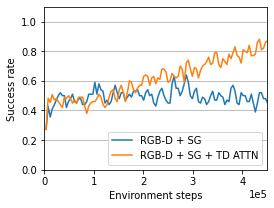

In [14]:
experiments = [
    #{
    #    "cat": "RGB-D + SG",
    #    "run": 2,
    #    "csv": "./choice_distractors/run-directed_search_hgt_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    #},
    {
        "cat": "RGB-D + SG",
        "run": 1,
        "csv": "./choice_distractors/run-directed_search_hgt_distractor_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG + TD ATTN",
        "run": 1,
        "csv": "./choice_distractors/run-directed_search_hfam_distractors_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },


]
dfs = []
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    df['cat'] = experiment['cat']
    df['run'] = experiment['run']
    df = df.rename(columns={"Value": "Success"})
    dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True)
ax.set_xlim(0, 0.35e6+1e5)
ax.set_ylim(0, 1.1)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "lower right")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Success rate")
ax.grid(visible=True, axis='y')
fig.savefig("/Users/michael/Downloads/directed_nav_distractors.pdf", bbox_inches='tight')


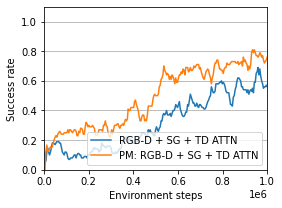

In [13]:
experiments = [
        {
        "cat": "RGB-D + SG + TD ATTN",
        "run": 2,
        "csv": "./8_envs/run-hgt_fixed_attention_no_premap_seed_0_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + SG + TD ATTN",
        "run": 2,
        "csv": "./8_envs/run-hgt_fixed_attention_seed_0_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
]
dfs = []
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    df['cat'] = experiment['cat']
    df['run'] = experiment['run']
    df = df.rename(columns={"Value": "Success"})
    dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True)
ax.set_xlim(0, 0.9e6+1e5)
ax.set_ylim(0, 1.1)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "lower right")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Success rate")
ax.grid(visible=True, axis='y')
fig.savefig("/Users/michael/Downloads/exploratory_nav_8_envs.pdf", bbox_inches='tight')
